In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="2"></a>
<h1 style='background:lightblue; border:0; color:black'><center>Importing Lib</center></h1> 

In [2]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

<a id="2"></a>
<h1 style='background:lightblue; border:0; color:black'><center>LOADING DATA</center></h1> 

In [3]:
data = pd.read_csv("train555.csv")

<img src="https://th.bing.com/th/id/R.f8655a22619e9996ea2e2b2cd934a01a?rik=Lt6s70JfWQWrew&riu=http%3a%2f%2fdataanalyticsedge.com%2fwp-content%2fuploads%2f2019%2f11%2ffeature_en_diamond_certification-777x383.jpg&ehk=7wBnr29Xg78N8zvWVHx6QY6owd9akknf7QW9RWx3TPc%3d&risl=&pid=ImgRaw&r=0" alt="Image">

<a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>LOADING DATA</center></h1> 

# Loading Data

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

**Feature description**:

**price** price in US dollars (\$326--\$18,823)This is the target column containing tags for the features. 

**The 4 Cs of Diamonds:-**

**carat (0.2--5.01)**
The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut (Fair, Good, Very Good, Premium, Ideal)**
In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color, from J (worst) to D (best)**
The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**
Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**




**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)**
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)**

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.


# EDA

In [4]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
# There are "unnamed" unneeded column but we actually know that it represent our index numbers so we drop it.

data = data.drop(columns = 'Id')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
# I get some informations about my data

data.info()
#There is no null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
#showing types of data
data.dtypes


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
data.shape
# 53940 observations and 10 variables

(43152, 10)

In [10]:
# check if my data has missing datas  or not

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Prepare data & Clean it

In [11]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We have values of x, y and z equal to 0. We will remove them. Thats shown in the min of them 



In [12]:
# When we check it ,we can see that there are some aberrant values that means there are  dimensionless or 2-dimensional diamonds.
data = data[(data[['x', 'y', 'z']] != 0).all(axis=1)]


In [13]:
data.shape
# we had 53940 observations before deleting x=0,y=0,z=0
# now we have  53920  observations
# We lost 20 observations.

(43135, 10)

In [14]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


<Axes: >

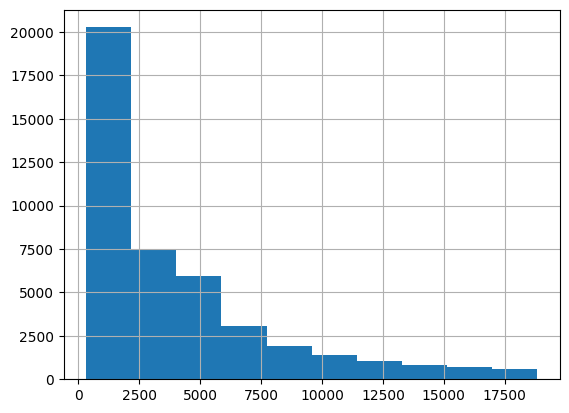

In [15]:
data['price'].hist()

Show Categorical data and categorical inside it 

In [16]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
categorical_columns

['cut', 'color', 'clarity']

In [17]:
# Getting the categories of each categorical column
for col in categorical_columns:
    print(col, data[col].unique())

cut ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
color ['I' 'G' 'F' 'H' 'D' 'E' 'J']
clarity ['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


Checking the corr with price and other attributes

In [18]:
categorical_data = data.select_dtypes(exclude=[np.number]).columns

In [19]:
def pie(column):
    labels=data[column].unique()
    size=[]
    for i in labels:
        value=data[column].value_counts()[[i]]
        size.append(int(value.values))
    return labels,size

In [20]:
labels,sizes=pie('cut')
labels2,sizes2=pie('color')
labels3,sizes3=pie('clarity')

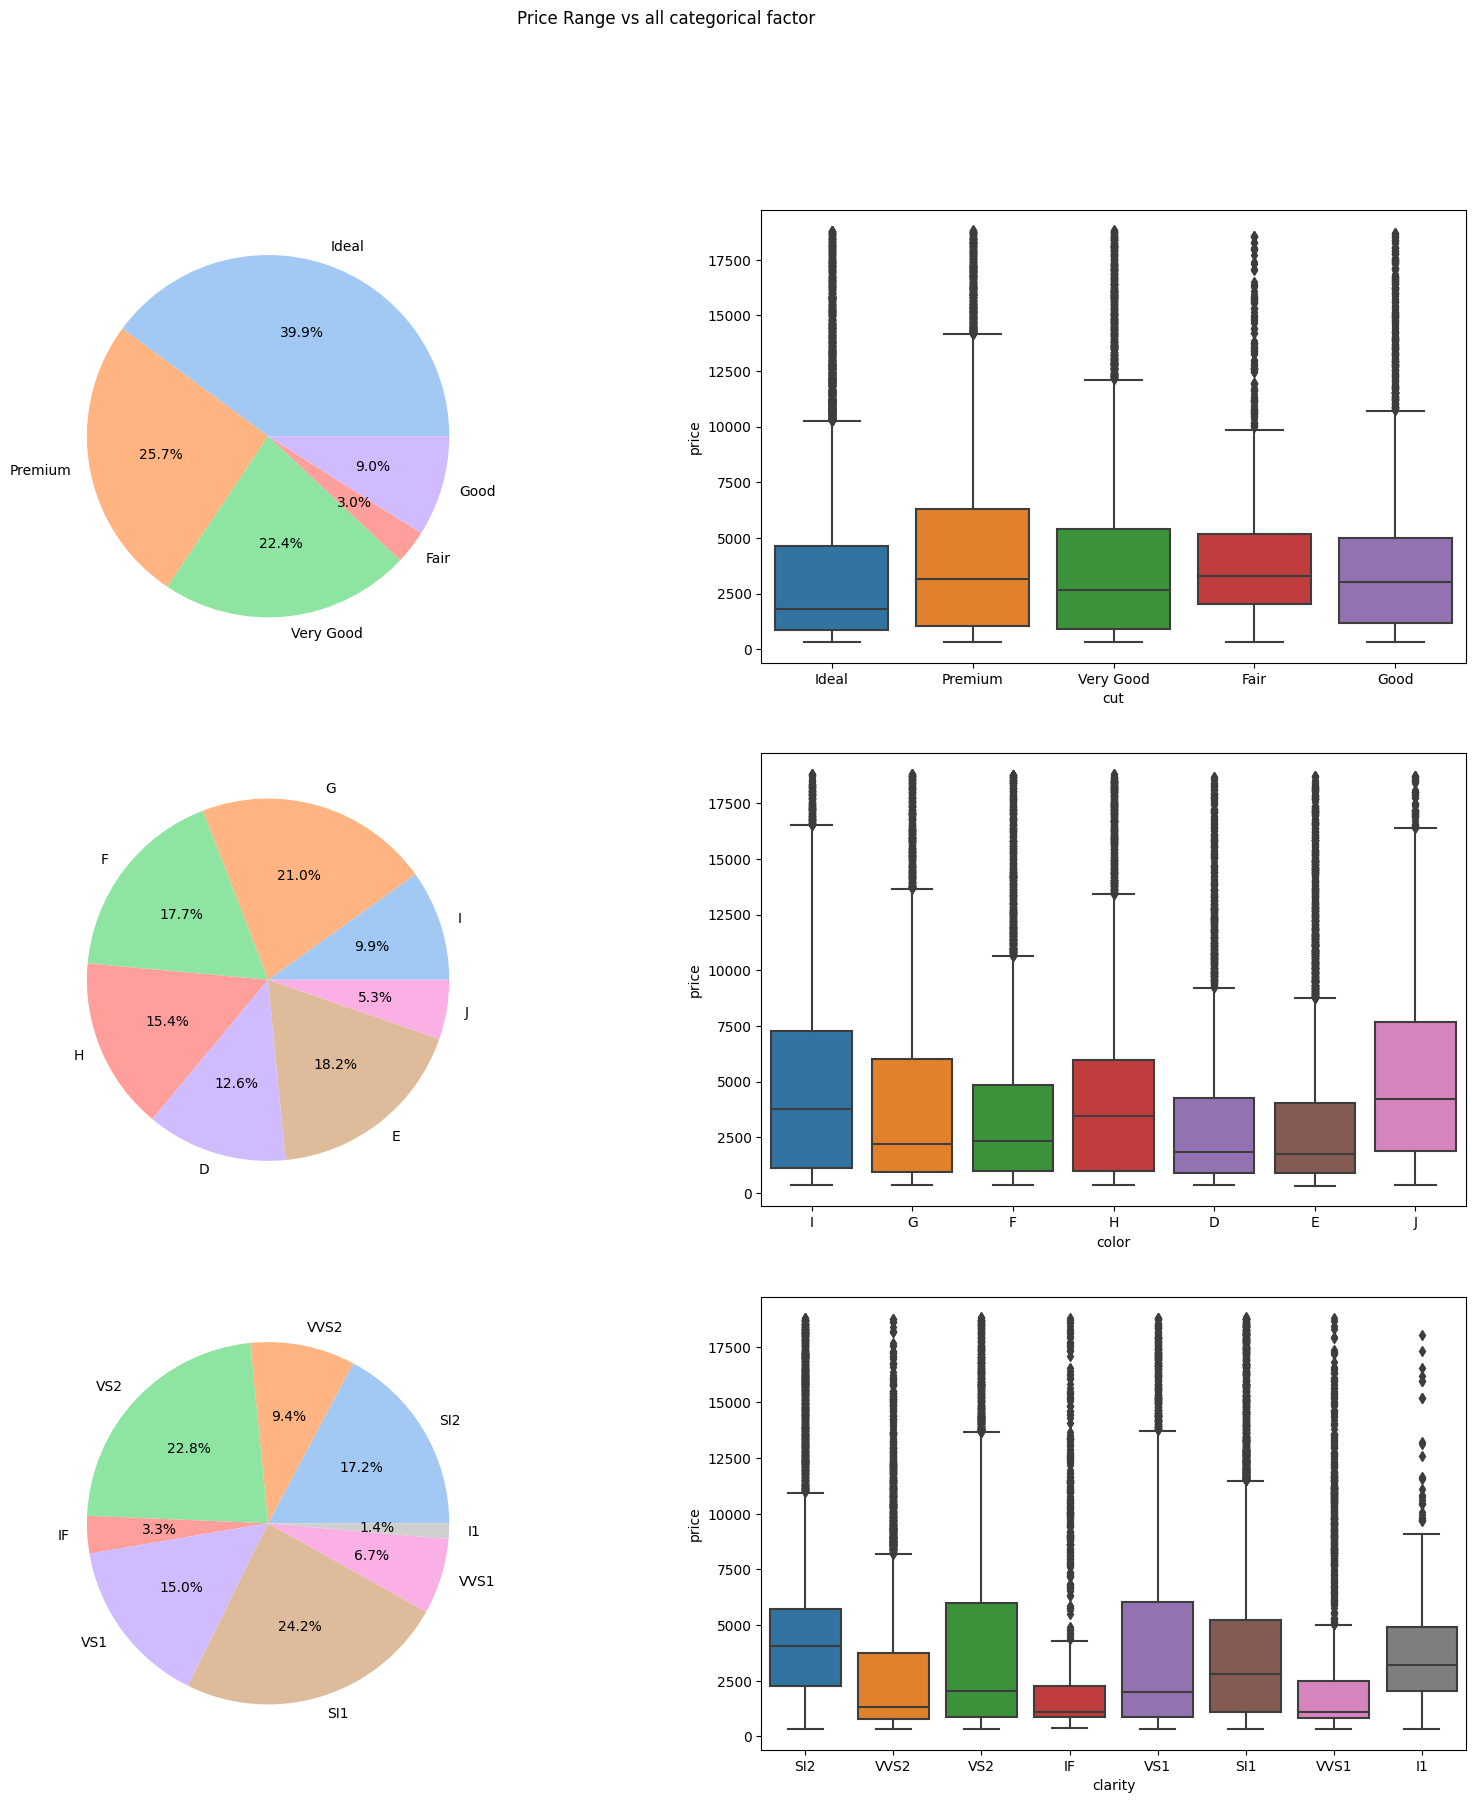

In [21]:
# visualstion for categorical 
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
colors = sns.color_palette('pastel')[0:8]
fig.suptitle('Price Range vs all categorical factor')
axes[0,0].pie(x=sizes, labels=labels,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[0, 1], data=data, x='cut', y='price')
axes[1,0].pie(x=sizes2, labels=labels2,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[1, 1], data=data, x='color', y='price')
axes[2,0].pie(x=sizes3, labels=labels3,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[2, 1], data=data, x='clarity', y='price')
plt.show()

In [22]:
# Extracting the correlation between price and the other columns
corr = data.corr()['price'].sort_values(ascending=False)
corr

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20928\3135980795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['price'].sort_values(ascending=False)


price    1.000000
carat    0.921872
x        0.887172
z        0.864861
y        0.862936
table    0.128571
depth   -0.013225
Name: price, dtype: float64

* As shown up here between the price and the carat it have the highest corr 
that shows that whenever  the carat have got up the price go up too with nearly same ratio 

In [53]:
corr_feats = corr.index[1:5]
corr_feats

Index(['carat', 'x', 'z', 'y'], dtype='object')

<Figure size 500x500 with 0 Axes>

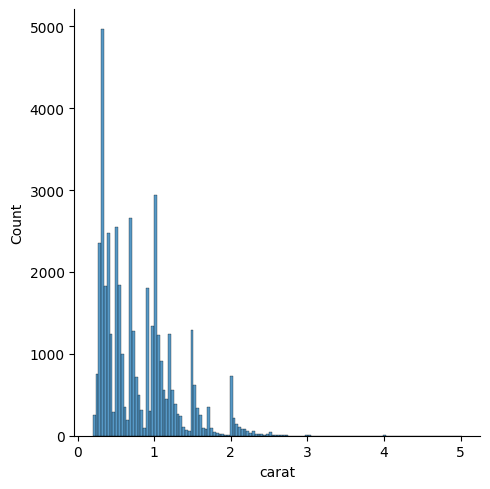

<Figure size 500x500 with 0 Axes>

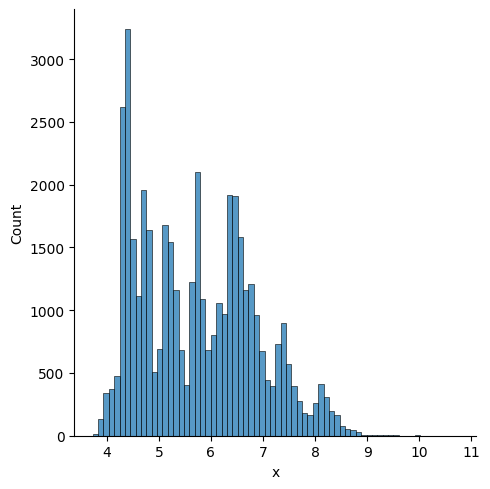

<Figure size 500x500 with 0 Axes>

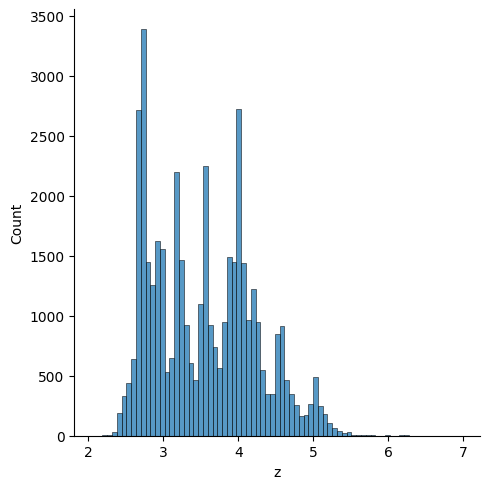

<Figure size 500x500 with 0 Axes>

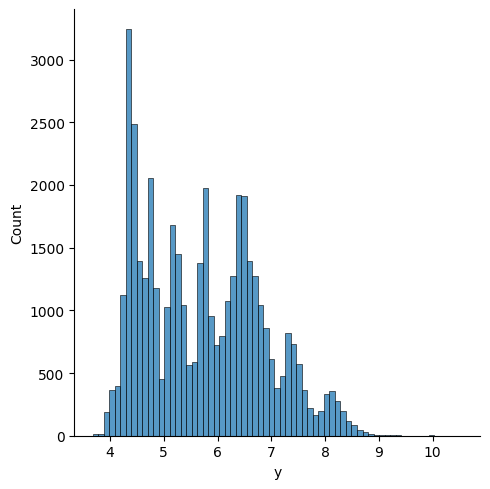

In [54]:
for feat in corr_feats:
    plt.figure(figsize=(5, 5))
    sns.displot(x=feat, data=data)
    plt.xlabel(feat)

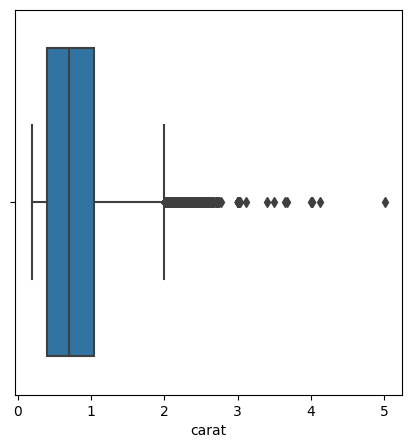

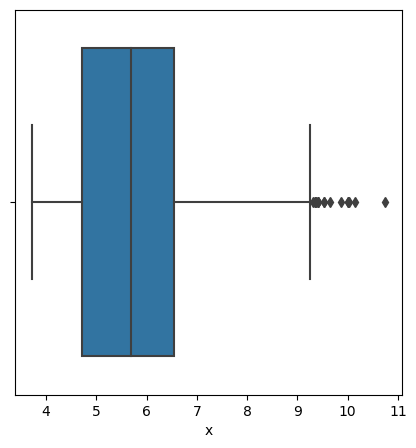

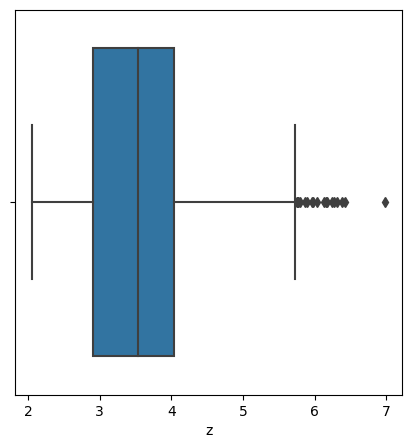

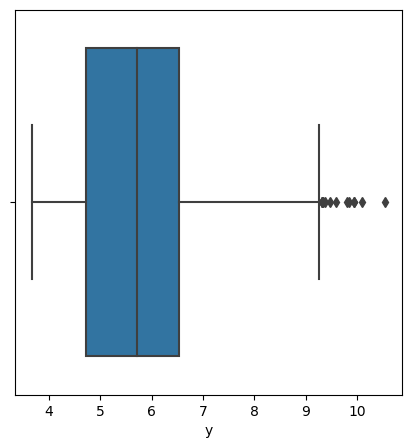

In [55]:
for feat in corr_feats:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=feat, data=data)
    plt.xlabel(feat)

**A few points to notice in these Box plot**

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" , "x "  have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.


In [56]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(43123, 10)

<Axes: >

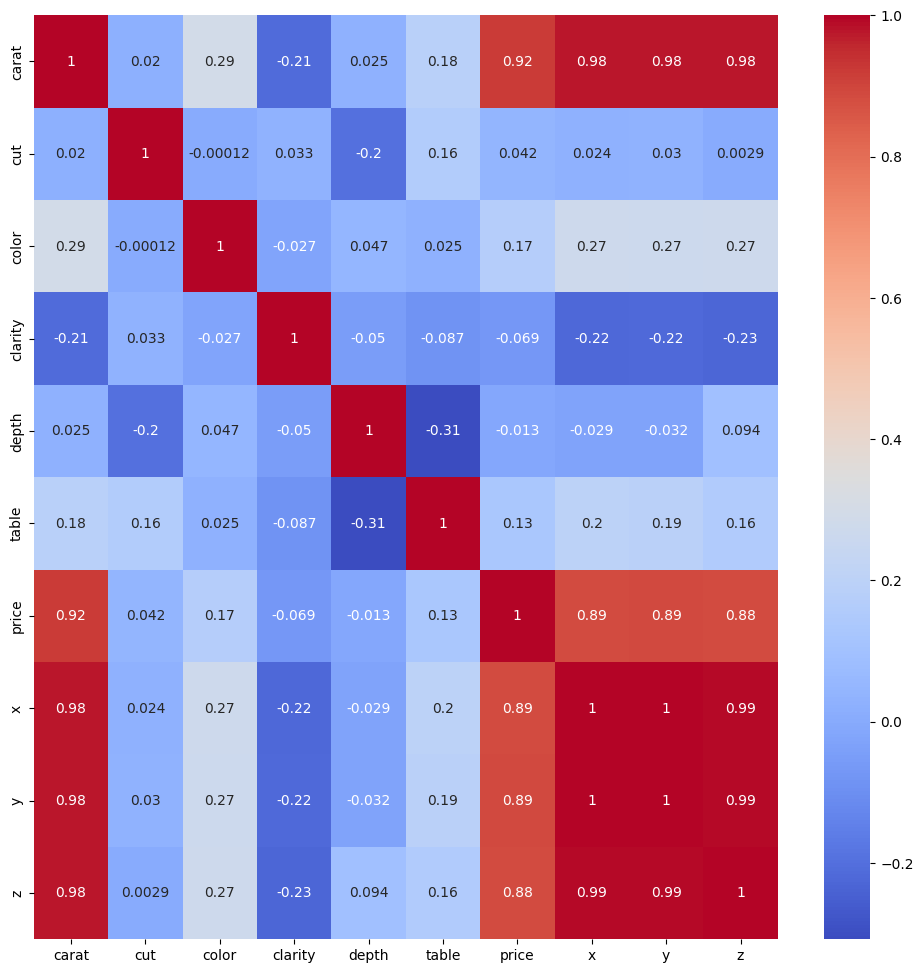

In [57]:
cmap = 'coolwarm' 
corrmat= data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Corr Show:**
* "x", "y" and "z" show a high correlation to the target column. 
* "depth", "cut" and "table" show low correlation


# Apply Model


In [58]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


## Before working and applying model we need change categ data by label encoder
## choose Label encoder over ohe to avoid high number of attributes

In [65]:
#convert categorical value
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_cut = preprocessing.LabelEncoder()
label_color = preprocessing.LabelEncoder()
label_clarity = preprocessing.LabelEncoder()


data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

In [66]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [68]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_xgb = Pipeline([("scalar5", StandardScaler()),
                        ("xgb_classifier", XGBRegressor())])
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [69]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1337.447434 
DecisionTree: -765.144586 
RandomForest: -562.546609 
KNeighbors: -845.358730 
XGBRegressor: -552.629705 


As seen above the best model to be used in prediciton data  is Random forest

In [70]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [71]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9790275010924477
Adjusted R^2: 0.9790099769544691
MAE: 277.32876348823544
MSE: 327829.1781495002
RMSE: 572.5636891643586


In [72]:
test=pd.read_csv('test555.csv')

In [73]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [74]:
# Define the order of the categories
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']

# Map the ordered categories to numerical values
test['color'] = test['color'].map({k: i for i, k in enumerate(color_order)})
test['cut'] = test['cut'].map({k: i for i, k in enumerate(cut_order)})
test['clarity'] = test['clarity'].map({k: i for i, k in enumerate(clarity_order)})

In [75]:
Id=test['Id']

In [76]:
pred =pipeline_xgb.predict(test.drop('Id',axis=1))
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)

In [77]:
sub

,Id,price
0,1,876.489441
1,2,3123.948975
2,3,648.256287
3,4,3176.634766
4,5,798.933838
...,...,...
10783,10784,1146.114502
10784,10785,6916.404297
10785,10786,2915.684570
10786,10787,5935.564453


In [78]:
sub.to_csv('SUBLAST1.csv',index=False)